<div style="text-align: center;">
    <h1><b>💸💸💸 Loan Approval Prediction 💸💸💸</b></h1>
    <img src="images\loan_image.jpg" alt="Description of Image" style="display: block; margin: 20px auto 0; width: 1000px; height: 500px;" />
</div>


## Importing Libraries

In [1]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

# Preprocessing and Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    precision_recall_curve,
    r2_score
)

# Model Persistence
import joblib

# Train-Test Split
from sklearn.model_selection import train_test_split

## Dataset Description:

1. **loan_id**: A unique identifier for each loan application.

2. **no_of_dependents**: The number of dependents (children, spouse, parents, etc.) that the loan applicant financially supports. This can affect their ability to repay the loan.
   - Example: `1` means the applicant has 1 dependent; `2` means the applicant has 2 dependents.

3. **education**: The education level of the loan applicant (e.g., Graduate, Not Graduate). Education can be a factor in determining the applicant's employability and income potential.
   - Example: `Graduate` or `Not Graduate`.

4. **self_employed**: A binary indicator (Yes/No) that shows whether the applicant is self-employed. Self-employed individuals may have irregular income, which could affect loan approval chances.
   - Example: `Yes` if self-employed, `No` otherwise.

5. **income_annum (in lakhs)**: The annual income of the loan applicant in lakhs. Higher income increases the applicant's ability to repay the loan.
   - Example: `96,00,000` translates to 96 lakhs.

6. **loan_amount (in lakhs)**: The amount of money the applicant is requesting as a loan, in lakhs. Higher loan amounts can lead to stricter approval criteria.
   - Example: `2,99,00,000` translates to 299 lakhs.

7. **loan_term (in years)**: The duration of the loan, typically in years. A longer loan term may reduce the monthly repayment amount but increase the overall interest paid.
   - Example: `12` means a 12-year loan term.

8. **cibil_score**: The credit score of the loan applicant, typically a score ranging from 300 to 900 that reflects the applicant’s creditworthiness. Higher scores indicate lower risk for the lender.
   - Example: `778` is a high score, indicating good credit.

9. **residential_assets_value (in lakhs)**: The monetary value of any residential property or assets the applicant owns, in lakhs. These assets could be used as collateral or increase the applicant’s perceived ability to repay.
   - Example: `24,00,000` translates to 24 lakhs.

10. **commercial_assets_value (in lakhs)**: The monetary value of any commercial property or assets the applicant owns, in lakhs. This can further enhance the applicant’s financial standing and improve loan approval chances.
    - Example: `1,76,00,000` translates to 176 lakhs.

11. **luxury_assets_value (in lakhs)**: The value of any luxury assets owned by the applicant (e.g., cars, jewelry, etc.), in lakhs. Luxury assets can contribute to the overall financial profile of the applicant.
    - Example: `2,27,00,000` translates to 227 lakhs.

12. **bank_asset_value (in lakhs)**: The value of assets or funds the applicant holds in bank accounts, in lakhs. This may serve as evidence of liquidity or savings that could cover loan payments.
    - Example: `80,00,000` translates to 80 lakhs.

13. **loan_status**: The outcome of the loan application (e.g., Approved or Rejected). This is the target variable for prediction in a loan approval model. The goal is to predict whether a loan will be approved based on the applicant's profile.
    - Example: `Approved` or `Rejected`.

## Load Dataset

In [2]:
# Load the datasets
data = pd.read_csv("data/loan_approval_dataset.csv") 

In [3]:
# Display the first few rows of the dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Null Values': data.isnull().sum(),
    'Percentage of Null Values (%)': data.isnull().mean() * 100,
    'Cardinality (Unique Values Count)': data.nunique(),
    'Data Type': data.dtypes
})
summary_df

,Null Values,Percentage of Null Values (%),Cardinality (Unique Values Count),Data Type
loan_id,0,0.0,4269,int64
no_of_dependents,0,0.0,6,int64
education,0,0.0,2,object
self_employed,0,0.0,2,object
income_annum,0,0.0,98,int64
loan_amount,0,0.0,378,int64
loan_term,0,0.0,10,int64
cibil_score,0,0.0,601,int64
residential_assets_value,0,0.0,278,int64
commercial_assets_value,0,0.0,188,int64


`loan_id` is unnecessary column which we gonna drop

In [7]:
# Dropping loan_id column
data.drop("loan_id" , axis = 1, inplace = True)

In [8]:
# Shape of the Dataset
data.shape

(4269, 12)

In [9]:
# Checking Duplicated values
data.duplicated().sum()

0

In [10]:
# columns name
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
# removing extra space from each column name
data.columns = [cols.strip() for cols in data.columns]
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [12]:
# categorical columns 
for x in data.select_dtypes(include=['object', 'category']).columns:
    print(data[x].value_counts())
    print("-"*50)

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
--------------------------------------------------
 Yes    2150
 No     2119
Name: self_employed, dtype: int64
--------------------------------------------------
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64
--------------------------------------------------


In [13]:
# Checking for negative values in numerical columns
negative_values = data.select_dtypes(include=['int']).apply(lambda x: (x < 0).sum())
negative_values

no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
dtype: int64

**residential asset values should not be negative, as they represent the market value of physical properties like houses, land, and buildings. Negative values for such assets would not make sense in typical real estate or accounting terms.**

In [14]:
data = data[data["residential_assets_value"] > 0]

selected data having positive residential asset values

## EDA (Expolatory Data Analysis)

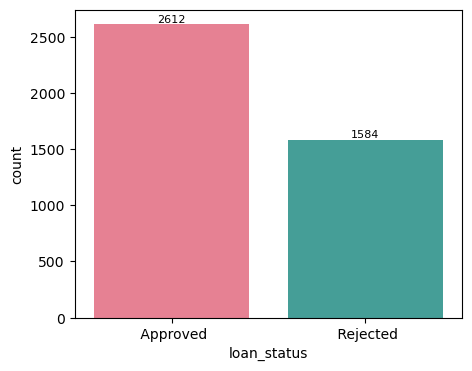

In [15]:
plt.figure(figsize=(5,4))
a = sns.countplot(x = "loan_status", data = data ,  palette='husl')
a.bar_label(a.containers[0], fontsize=8);

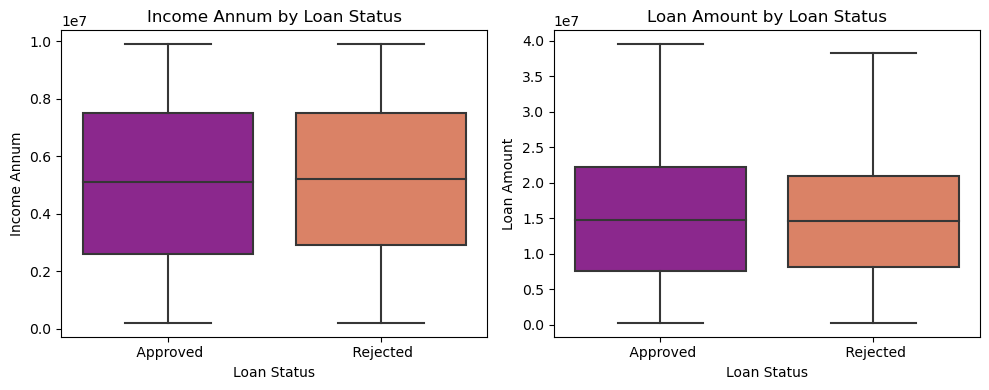

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot data on the first subplot for income_annum
sns.boxplot(x='loan_status', y='income_annum', data=data, ax=axes[0], palette='plasma')
axes[0].set_title('Income Annum by Loan Status')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Income Annum')

# Plot data on the second subplot for loan_amount
sns.boxplot(x='loan_status', y='loan_amount', data=data, ax=axes[1], palette='plasma')
axes[1].set_title('Loan Amount by Loan Status')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Loan Amount')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='income_annum', ylabel='loan_amount'>

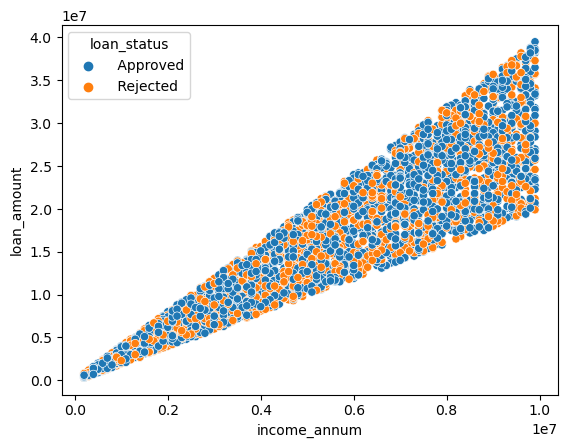

In [17]:
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=data)

<Axes: xlabel='cibil_score', ylabel='Count'>

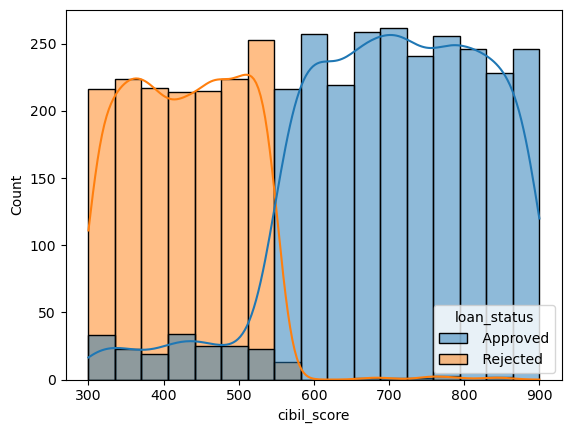

In [18]:
sns.histplot(data=data, x='cibil_score', hue='loan_status', kde=True)

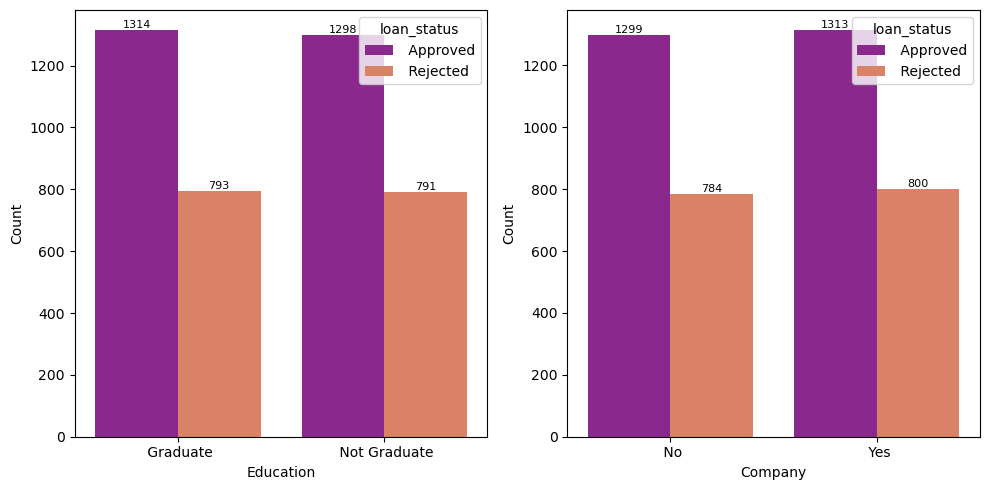

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot data on the first subplot
a = sns.countplot(x = "education", hue='loan_status', data = data, ax=axes[0], palette='plasma')
for container in a.containers:
    a.bar_label(container, fontsize=8)
axes[0].set_title('')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Plot data on the second subplot
a = sns.countplot(x = "self_employed", hue='loan_status', data = data, ax=axes[1], palette='plasma')
for container in a.containers:
    a.bar_label(container, fontsize=8)
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

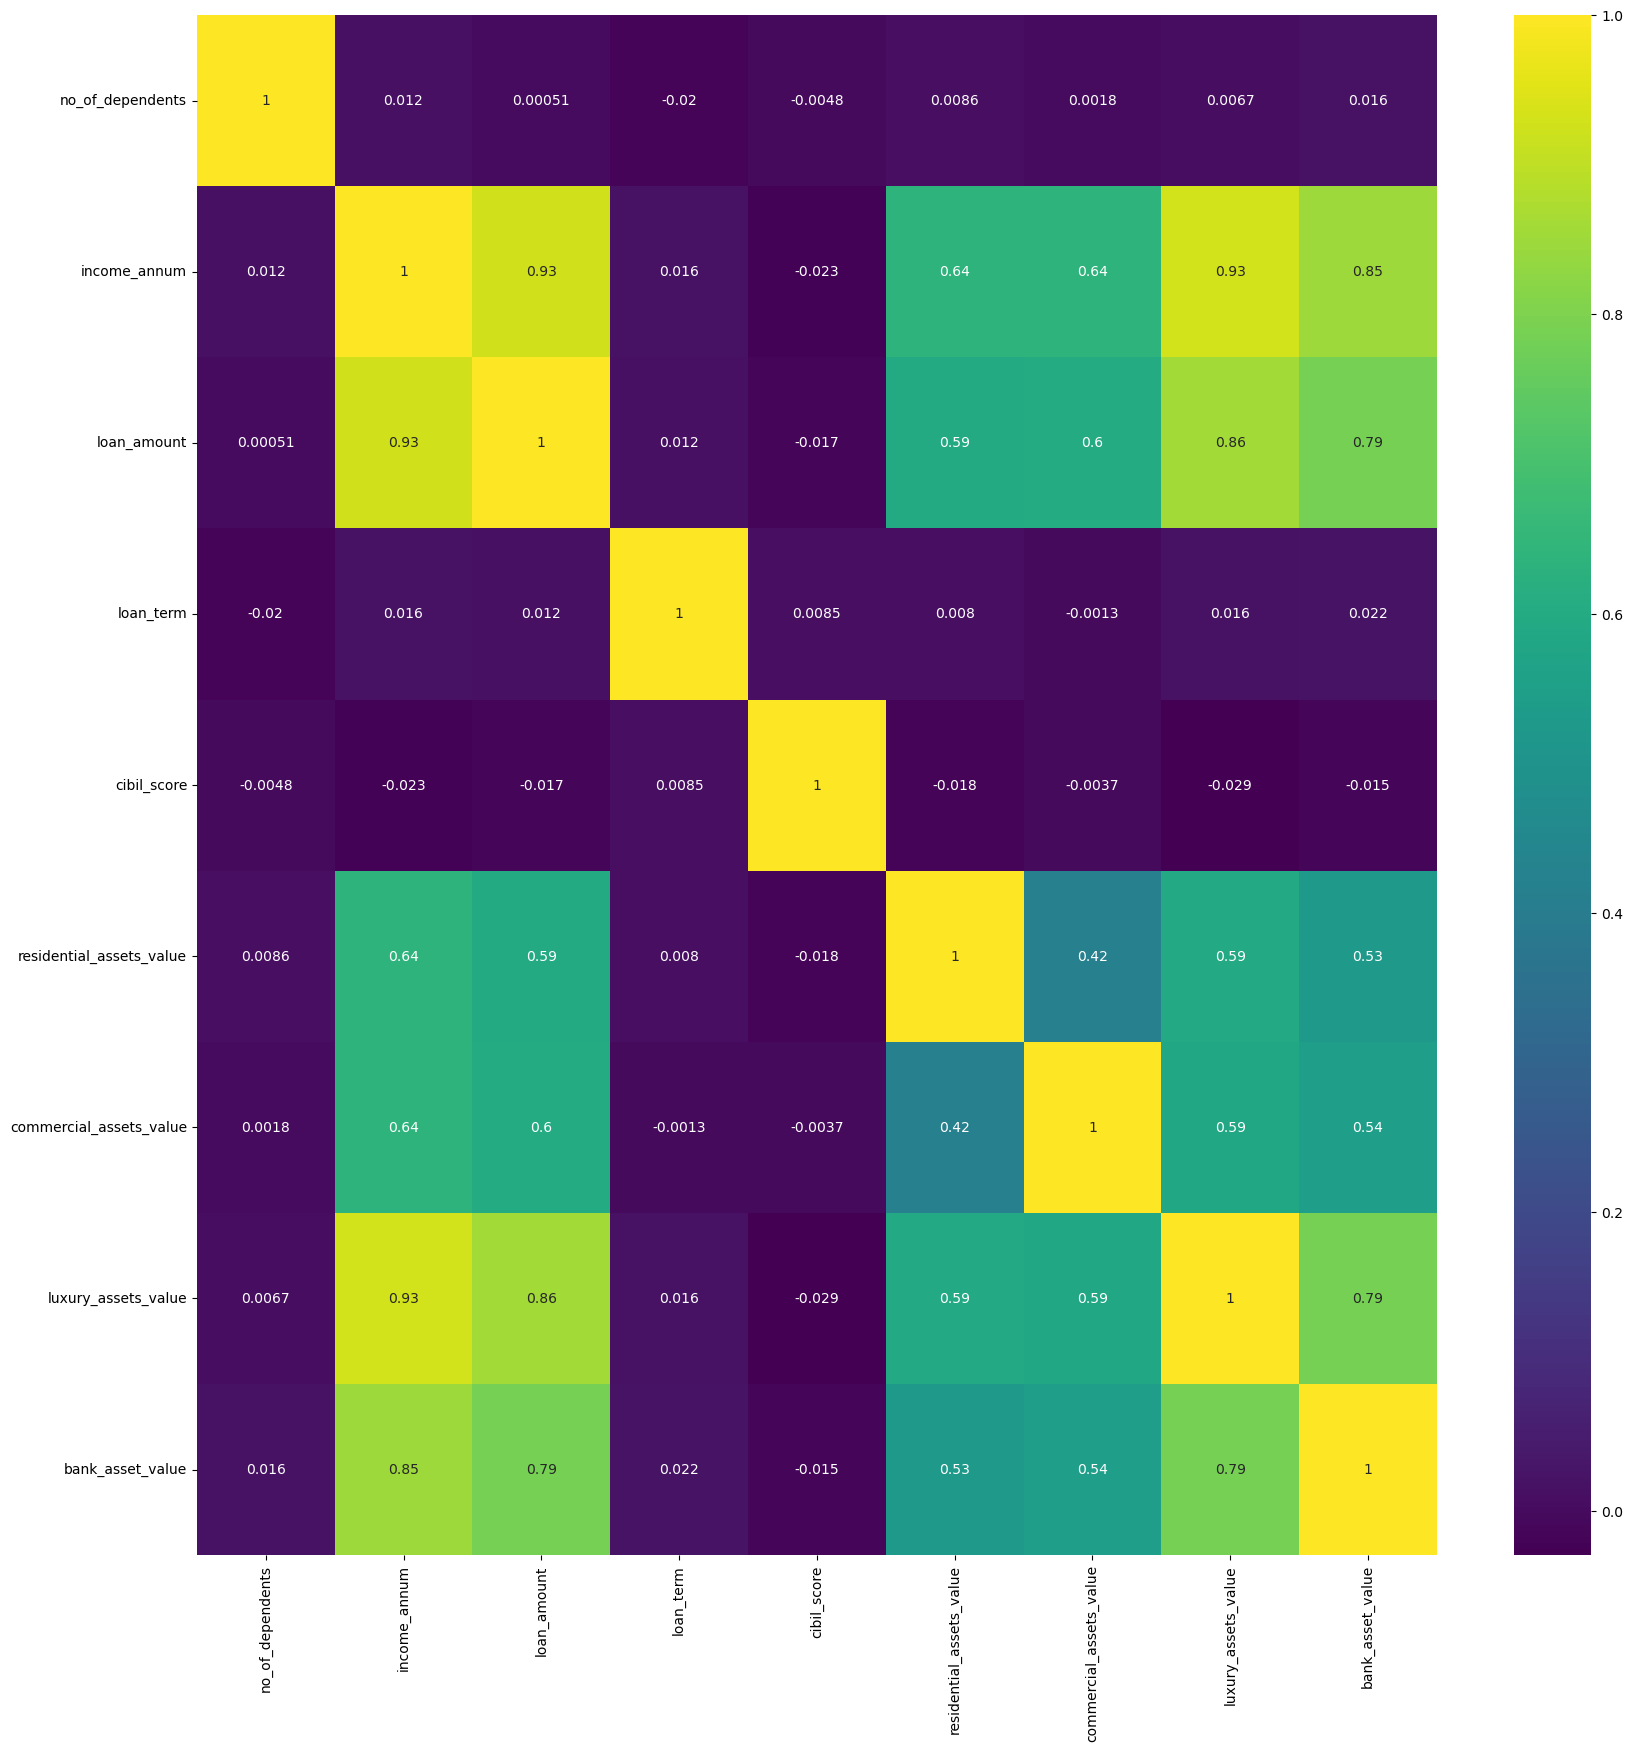

In [20]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.select_dtypes(include=['number']).corr(), cmap='viridis', annot=True)
plt.show()

## Data Preprocessing

In [21]:
# creating new colummn `total_asset_value`
data["total_asset_value"] = data['residential_assets_value'] + data['commercial_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']

In [22]:
# removing space from the data and mapping
data["education"] = data["education"].apply(lambda x:x.strip())
# data["education"] = data["education"].map({"Graduate":1,"Not Graduate":0 })

In [23]:
# removing space from the data and mapping
data["self_employed"] = data["self_employed"].apply(lambda x:x.strip())
# data["self_employed"] = data["self_employed"].map({"Yes":1,"No":0 })

In [24]:
# removing space from the data and mapping
data["loan_status"] = data["loan_status"].apply(lambda x:x.strip())
data["loan_status"] = data["loan_status"].map({"Approved":1,"Rejected":0 })

In [25]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,68300000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,19200000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,62200000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,56000000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,63200000


In [26]:
# Dropping irrelevant or highly correlated asset columns and isolating the target variable 'loan_status'
X = data.drop(columns=["loan_status", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"], axis=1)
y = data["loan_status"]

In [27]:
# Split the dataset into training and testing sets (80% training, 20% testing), ensuring reproducibility with random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [28]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income_annum', 'loan_amount', 'cibil_score', 'total_asset_value']),
        ('cat', OneHotEncoder(), ['no_of_dependents', 'education', 'self_employed', 'loan_term'])
    ]
)

# Define the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression())  # Machine learning model
])

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'total_asset_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['no_of_dependents',
                                                   'education', 'self_employed',
                                                   'loan_term'])])),
                ('classifier', LogisticRegression())])

In [30]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# y_train_pred = pipeline.predict(X_train)
# print(accuracy_score(y_train_pred, y_train))

# y_test_pred = pipeline.predict(X_test)
# print(accuracy_score(y_test_pred, y_test))

print(f'train_accuracccy: {train_accuracy * 100:.2f}%')
print(f'test_accuracy: {test_accuracy * 100:.2f}%')

train_accuracccy: 94.93%
test_accuracy: 93.10%


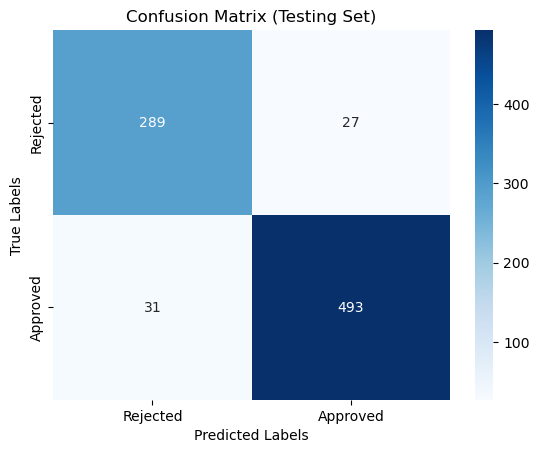

In [31]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

test_cm = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Testing):\n{test_cm}")

# Define your custom labels
labels = ['Rejected', 'Approved']

# Visualize confusion matrix with custom labels using seaborn heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Decision Tree 

In [32]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income_annum', 'loan_amount', 'cibil_score', 'total_asset_value']),
        ('cat', OneHotEncoder(), ['no_of_dependents', 'education', 'self_employed', 'loan_term'])
    ]
)

# Define the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier',  DecisionTreeClassifier())  # Machine learning model
])

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'total_asset_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['no_of_dependents',
                                                   'education', 'self_employed',
                                                   'loan_term'])])),
                ('classifier', DecisionTreeClassifier())])

In [34]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# y_train_pred = pipeline.predict(X_train)
# print(accuracy_score(y_train_pred, y_train))

# y_test_pred = pipeline.predict(X_test)
# print(accuracy_score(y_test_pred, y_test))

print(f'train_accuracccy: {train_accuracy * 100:.2f}%')
print(f'test_accuracy: {test_accuracy * 100:.2f}%')

train_accuracccy: 100.00%
test_accuracy: 97.26%


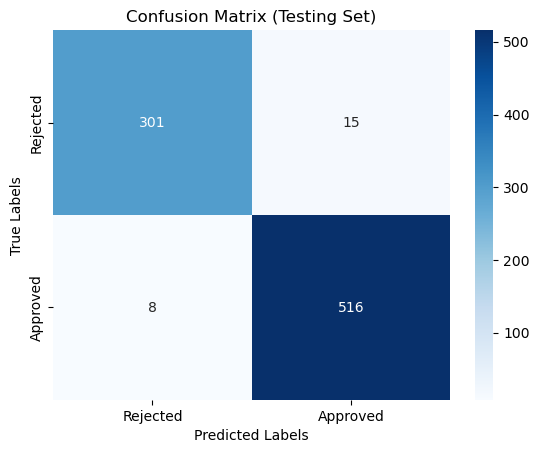

In [35]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

test_cm = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Testing):\n{test_cm}")

# Define your custom labels
labels = ['Rejected', 'Approved']

# Visualize confusion matrix with custom labels using seaborn heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Support Vector Machine (SVM)

In [36]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income_annum', 'loan_amount', 'cibil_score', 'total_asset_value']),
        ('cat', OneHotEncoder(), ['no_of_dependents', 'education', 'self_employed', 'loan_term'])
    ]
)

# Define the full pipeline with preprocessing and Support Vector Machine classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', SVC(probability=True))  # SVM classifier with probability estimates for ROC-AUC
])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'total_asset_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['no_of_dependents',
                                                   'education', 'self_employed',
                                                   'loan_term'])])),
                ('classifier', SVC(probability=True))])

In [38]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# y_train_pred = pipeline.predict(X_train)
# print(accuracy_score(y_train_pred, y_train))

# y_test_pred = pipeline.predict(X_test)
# print(accuracy_score(y_test_pred, y_test))

print(f'train_accuracccy: {train_accuracy * 100:.2f}%')
print(f'test_accuracy: {test_accuracy * 100:.2f}%')

train_accuracccy: 96.78%
test_accuracy: 93.81%


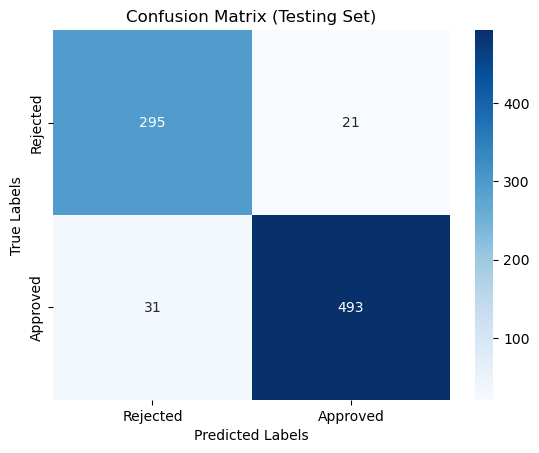

In [39]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

test_cm = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Testing):\n{test_cm}")

# Define your custom labels
labels = ['Rejected', 'Approved']

# Visualize confusion matrix with custom labels using seaborn heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Random Forest

In [40]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income_annum', 'loan_amount', 'cibil_score', 'total_asset_value']),
        ('cat', OneHotEncoder(), ['no_of_dependents', 'education', 'self_employed', 'loan_term'])
    ]
)

# Define the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100))  # Machine learning model
])

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'total_asset_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['no_of_dependents',
                                                   'education', 'self_employed',
                                                   'loan_term'])])),
                ('classifier', RandomForestClassifier())])

In [42]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# y_train_pred = pipeline.predict(X_train)
# print(accuracy_score(y_train_pred, y_train))

# y_test_pred = pipeline.predict(X_test)
# print(accuracy_score(y_test_pred, y_test))

print(f'train_accuracccy: {train_accuracy * 100:.2f}%')
print(f'test_accuracy: {test_accuracy * 100:.2f}%')

train_accuracccy: 100.00%
test_accuracy: 96.55%


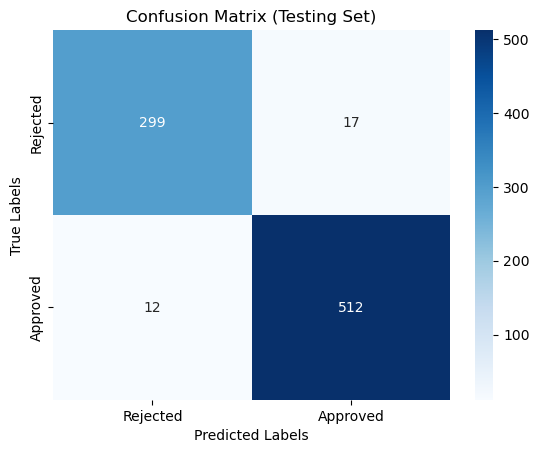

In [43]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

test_cm = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Testing):\n{test_cm}")

# Define your custom labels
labels = ['Rejected', 'Approved']

# Visualize confusion matrix with custom labels using seaborn heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## xgboost

In [44]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['income_annum', 'loan_amount', 'cibil_score', 'total_asset_value']),
        ('cat', OneHotEncoder(), ['no_of_dependents', 'education', 'self_employed', 'loan_term'])
    ]
)

# Define the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))  # Machine learning model
])

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'total_asset_value']),
                                                 ('cat', OneHotEncoder(),
                                                  ['no_of_dependents',
                                                   'education', 'self_employed',
                                                   'loan_term'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_byn...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [46]:
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# y_train_pred = pipeline.predict(X_train)
# print(accuracy_score(y_train_pred, y_train))

# y_test_pred = pipeline.predict(X_test)
# print(accuracy_score(y_test_pred, y_test))

print(f'train_accuracccy: {train_accuracy * 100:.2f}%')
print(f'test_accuracy: {test_accuracy * 100:.2f}%')

train_accuracccy: 100.00%
test_accuracy: 98.10%


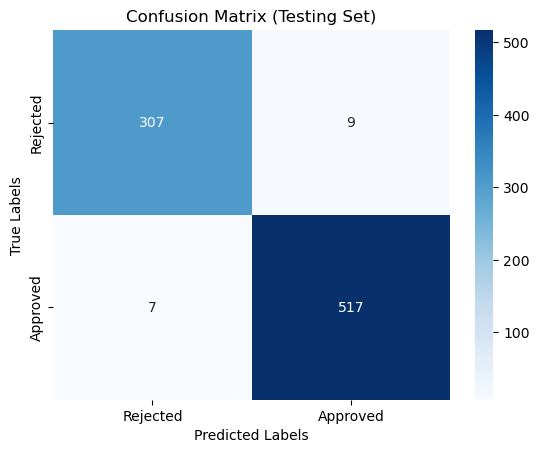

In [47]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

test_cm = confusion_matrix(y_test, y_test_pred)
# print(f"Confusion Matrix (Testing):\n{test_cm}")

# Define your custom labels
labels = ['Rejected', 'Approved']

# Visualize confusion matrix with custom labels using seaborn heatmap
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()